**PROJECT TITLE: CREDIT CARD USUAGE SEGMENTATION**

**Project Overview:**

**This project focuses on developing unsupervised learning models for customer segmentation based on credit card usage data. The models aim to provide insights into distinct customer segments, improve credit risk assessment, and optimize marketing strategies. Deliverables include segmentation models, comprehensive data visualizations, and a comparative analysis of various algorithms.**

**STEP 1: ALL THE NECESSARY LIBRARIES REQUIRED FOR THE PROJECT ARE IMPORTED HERE**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


**STEP 2: FILE INGESTION AND DATASET INSPECTION IS PERFORMED**

**Here we are reading the 'Customer Data' csv file and storing the data to a new dataframe "data".**

In [ ]:
data = pd.read_csv('Customer Data.csv')

**Visualized dataset for determining the number of rows and columns.**

In [ ]:
data.shape

(8950, 18)

**Visualizing dataset for the first 10 rows.**

In [ ]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Visualizing dataset for determining the Column data type and not-null value count of columns.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Visualized dataset for determining the summary statistical parameters like mean, standard deviation, percentile, count, minimum and maximum values for numerical columns in our Dataset.**

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Visualized dataset for determining the null/missing values in the respective columns.**

In [ ]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Checked the dataset for identifying any duplicate values or duplicate rows.**

In [ ]:
print(data.duplicated().sum())
data[data.duplicated()]

0


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


**STEP 3: PERFORMING EXPLORATORY DATA ANALYSIS (EDA)**

**Visualized dataset for representing the null values using a SNS Heatmap.**

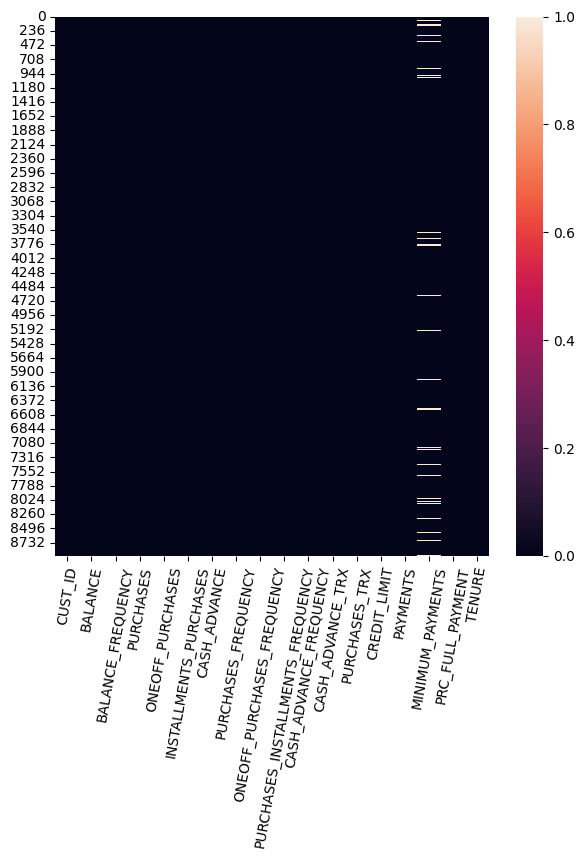

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.isnull())
plt.xticks(rotation=80)
plt.show()

**The heatmap above shows that we have very minimal missing values in the dataset 'Customer Data'.**

**Visualizing dataset further by utilizing Correlation Heatmap.**

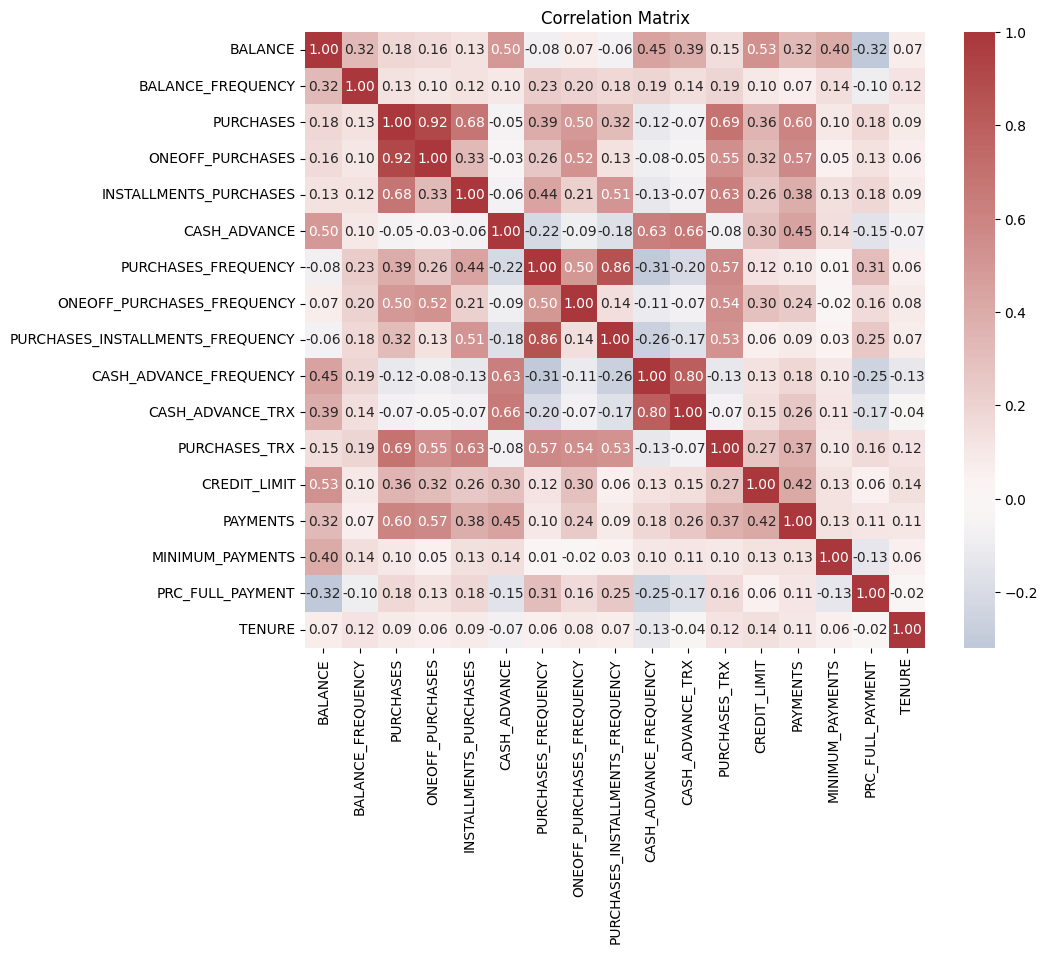

In [ ]:
#Function is defined here

def correlation_heatmap(data, numeric_col1):
 corr = data[numeric_col1].corr()
 plt.figure(figsize=(10, 8))
 sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)

 #Here cmap decides what colour and shapes we want in the Matrix.

 plt.title('Correlation Matrix')
 plt.show()

numeric_col1 = data.select_dtypes(include=[np.number]).columns.tolist()
if 'CUST_ID' in numeric_col1:
   numeric_col1.remove('CUST_ID')

correlation_heatmap(data, numeric_col1)

**Customer Identity or CUST_ID column in our dataset is a unique ID and thats'why not very significant and for this reason, it's removed from column list before calling the correlation_heatmap function.**

**INFERENCE FROM CORRELATION MATRIX: PURCHASE AND ONEOFF_PURCHASES ARE CLOSELY RELATED OR POSITIVELY CORRELATED WHEREAS PRC_FULL_PAYMENT AND BALANCE ARE VERY POORELY RELATED OR NEGATIVELY COORELATED**

**STEP 4: DATA PRE-PROCESSING IS PERFORMED HERE TO REMOVE ANY INCONSISTANCIES IN THE RAW DATA**

**CUST_ID column is dropped as it's insignificant in the dataset but a copy of it has to be created so that we can trace the original customer after clustering.**

In [ ]:
cust_identity = data['CUST_ID']
data = data.drop(columns=['CUST_ID'])
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Here the missing value of CREDIT_LIMIT is filled with Medium value of that column**

In [ ]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)
data.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


**Here the missing values of MINIMUM_PAYMENTS columns are filled by establishing a relation between Balance and minimum payment and then determing the median values. Then that ratio is utilised with Balance column data to fill the values in column.**


In [ ]:
ratio = (data['MINIMUM_PAYMENTS'] / data['BALANCE']).median()
data['MINIMUM_PAYMENTS'].fillna(data['BALANCE'] * ratio, inplace=True)

print(data.isnull().sum()[[ 'MINIMUM_PAYMENTS']])

MINIMUM_PAYMENTS    0
dtype: int64


**STEP 5: PERFORMING FEATURE ENGINEERING**

**A copy of the dataset is made here for performing feature engineering.**

**'If statements' are explicitely written here to make the code reusable if different csv files dataset are used.
Here the new features are made based on the scores that are obtained from the correlation matrix.
Replace function converts any zero value to np.nan value in division so to avoid zero and zero by zero division case.**

In [ ]:
numeric_features = data.copy()


if {'PURCHASES', 'PURCHASES_TRX'}.issubset(numeric_features.columns):
    numeric_features['Average_purchase_amt'] = numeric_features['PURCHASES'] / numeric_features['PURCHASES_TRX'].replace(0, np.nan)

if {'CASH_ADVANCE', 'CASH_ADVANCE_TRX'}.issubset(numeric_features.columns):
    numeric_features['Cash_advance_per_trx'] = numeric_features['CASH_ADVANCE'] / numeric_features['CASH_ADVANCE_TRX'].replace(0, np.nan)

if {'PAYMENTS', 'CREDIT_LIMIT'}.issubset(numeric_features.columns):
    numeric_features['Payment_to_Crlimit'] = numeric_features['PAYMENTS'] / numeric_features['CREDIT_LIMIT'].replace(0, np.nan)

if {'BALANCE', 'CREDIT_LIMIT'}.issubset(numeric_features.columns):
    numeric_features['Utilization'] = numeric_features['BALANCE'] / numeric_features['CREDIT_LIMIT'].replace(0, np.nan)

if {'ONEOFF_PURCHASES', 'PURCHASES'}.issubset(numeric_features.columns):
    numeric_features['Oneoff_ratio'] = numeric_features['ONEOFF_PURCHASES'] / numeric_features['PURCHASES'].replace(0, np.nan)

if {'INSTALLMENTS_PURCHASES', 'PURCHASES'}.issubset(numeric_features.columns):
    numeric_features['Installment_ratio'] = numeric_features['INSTALLMENTS_PURCHASES'] / numeric_features['PURCHASES'].replace(0, np.nan)


#Here we are again converting all the NAN values in the numeric_features dataset into zero.

numeric_features.fillna(0, inplace=True)

print("After creating new columns, shape of the dataset is =", numeric_features.shape)



After creating new columns, shape of the dataset is = (8950, 23)


In [ ]:
numeric_features.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Average_purchase_amt,Cash_advance_per_trx,Payment_to_Crlimit,Utilization,Oneoff_ratio,Installment_ratio,cluster_label
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,47.700000,0.000000,0.201802,0.040901,0.0,1.0,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,0.000000,1610.736371,0.586148,0.457495,0.0,0.0,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,0.082942,0.332687,1.0,0.0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,767.751118,0.000000,12,1499.000000,205.788017,0.000000,0.222223,1.0,0.0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,16.000000,0.000000,0.565279,0.681429,1.0,0.0,1


**STEP 6: PERFORMING SCALING OF DATA AND K MEANS CLUSTERRING**

**Here 'feature_cols' is the complete list of column data and column names which are strings.
  'select_dtypes' here only selects the columns which are numeric so that if the .csv file changes with similar columns, then also it can handle or process the columns without breaking the code.**

**Further, here we have to pass only numeric features to scalar fit transform and that'why we need to extract data or numeric values without labels.**

In [ ]:
feature_cols = numeric_features.select_dtypes(include=[np.number]).columns.tolist()

X = numeric_features[feature_cols]

scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

#Here scaled_features is a dataframe that contains all the column data from standard scalar transformation.

print("The Scaled feature matrix shape is", scaled_features.shape)

The Scaled feature matrix shape is (8950, 23)


**'wcss' means "Within-Cluster Sum of Squares". So here we will initially create an empty list. A custom function is then defined and called to get the results from KMeans algorithm.**


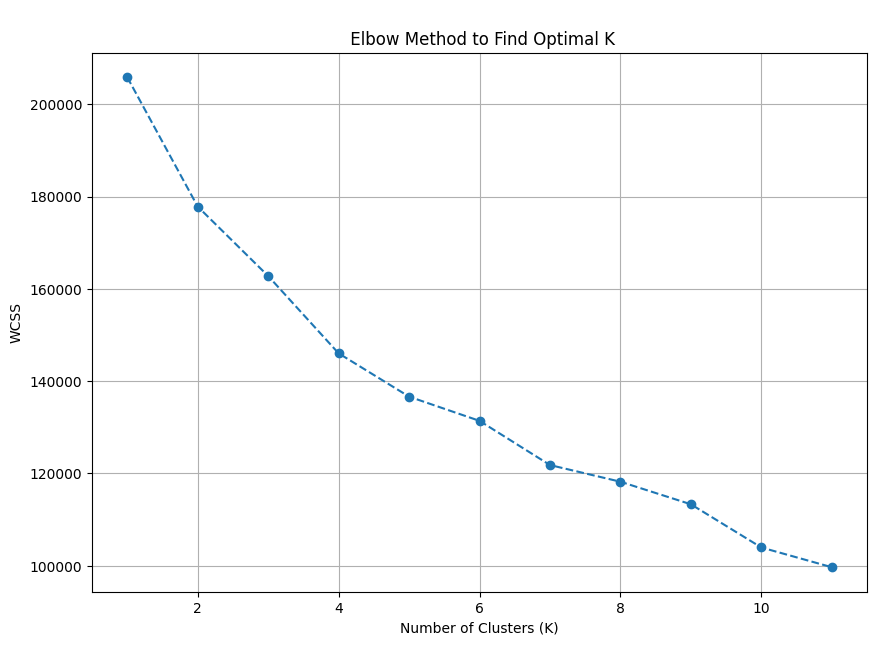

In [ ]:
def evaluate_kmeans(X, ks=range(1, 12)):
 wcss = []
 for i in ks:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
 return wcss

kmeans_results = evaluate_kmeans(scaled_features.values, ks=range(1, 12))


# Plotting the Elbow Method graph between interia or wcss and number of cluster(k)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 12), kmeans_results, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('\n Elbow Method to Find Optimal K')
plt.grid()
plt.show()

**INFERENCE: The optimal number of clusters based on the Elbow Method is K= 6. This is where the 'WCSS' curve bends and begins to flatten. So we can assume K=6 for KMeans clustering and can then  evaluate the quality further using silhouette scores.**

**Here we will perform the silhouette score analysis to find out the value of K for the best quality of cluters. An empty list is created here for storing silhouette score values. Silhouette needs alteast 2 clusters and so it started with 2.**

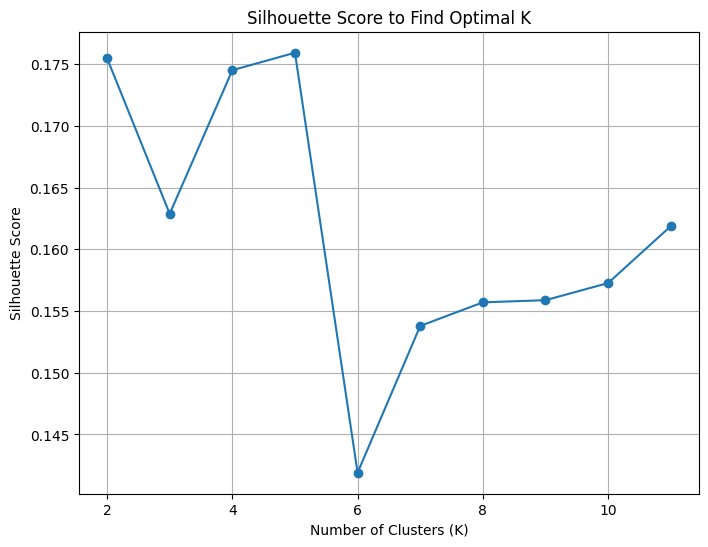

In [ ]:
silhouette_scores = []
K_range = range(2, 12)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(scaled_features)
    silhouette = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(silhouette)

#Plotting the Graph for silhouette scores

plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal K')
plt.grid()
plt.show()


**INFERENCE : FROM THE ABOVE GRAPH ANALYSIS OF SILHOUETTE SCORE, WE CAN SELECT EITHER FOUR OR FIVE CLUSTER WITH VALUE 0.18 AS THE REQUISITE NUMBER OF CLUSTERS IN OUR TASK AS FROM INITIAL INSIGHTS, CHOOSING EITHER FOUR OR FIVE NUMBER OF CLUSTER HAS THE BEST QUALITY OF SEPERATION.**

**STEP 7: PERFORMING AGGLOMERATIVE CLUSTERING EVALUATION**

**Here in Agglomerative clusturing, average linkage is choosen as it
minimizes the average distance between all pairs of observations in different clusters.**

In [ ]:
aggm_results = []

for k in range(2, 11):
 aggm = AgglomerativeClustering(n_clusters=k, linkage='average')
 labels = aggm.fit_predict(scaled_features.values)
 sil1 = silhouette_score(scaled_features, labels)
 aggm_results.append({'k': k, 'silhouette': sil1, 'model': aggm})
 print(f'Agg k={k} : silhouette={sil1:.2f}')


Agg k=2 : silhouette=0.94
Agg k=3 : silhouette=0.86
Agg k=4 : silhouette=0.83
Agg k=5 : silhouette=0.81
Agg k=6 : silhouette=0.80
Agg k=7 : silhouette=0.75
Agg k=8 : silhouette=0.75
Agg k=9 : silhouette=0.74
Agg k=10 : silhouette=0.69


**INFERENCE: BASED ON THE SILHOUETTE SCORES OBTAINED USING THE AGGLOMERATIVE CLUSTURING METHOD, THE BEST K IS 2 BUT IF WE COMPARE IT WITH OUR PREVIOUS RESULTS WITH INERTIA AND SILHOUETTE SCORE BASED ON KMEANS, THEN WE CAN CONCLUDE THAT THE OPTIMAL K VALUES ARE 4 AND 5.**

**STEP 8: PERFORMING PRINCIPAL COMPONENT ANALYSIS IN 2 DIMENSION**

**Here we have assumed that the best cluster for our dataset is 5 and then PCA is performed. PCA algorith works by determing the covariance matrix and then by calculating the eigen vectors of the covariance matrix. The eigen vectors with largest eigen values are our principal components. Finally a matrix is created to project the data on principal components.**

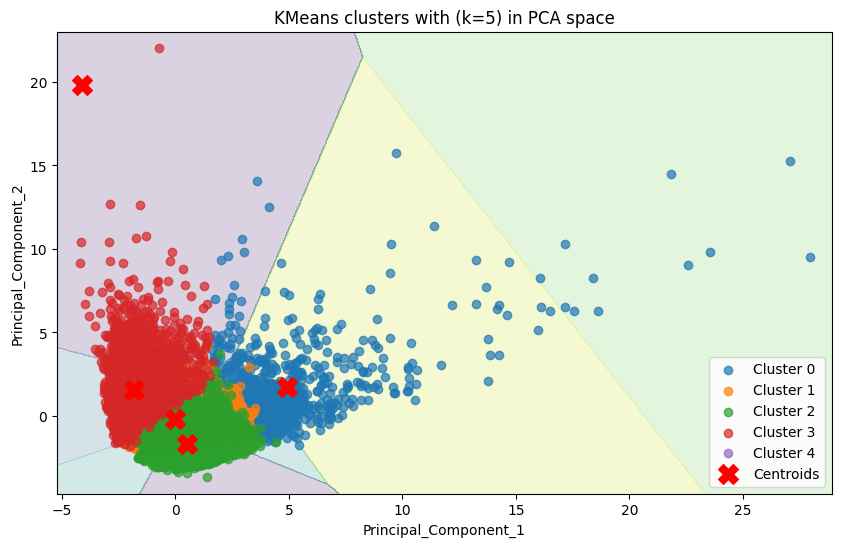

pca1 shape: (8950, 2)
kmeans_labels shape: (8950,)
Unique labels: [0 1 2 3 4]


In [ ]:
best_k = 5
best_kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans_labels = best_kmeans.fit_predict(scaled_features.values)

#Here kmeans_labels is a cluster label array.

pca = PCA(n_components=2)
pca1 = pca.fit_transform(scaled_features.values)


#Projecting the clusters and their centres into PCA 2D space

h = 0.05          # This is step size of the grid created
x_min, x_max = pca1[:, 0].min() - 1, pca1[:, 0].max() + 1
y_min, y_max = pca1[:, 1].min() - 1, pca1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicted cluster label for each point in the mesh

Z = kmeans.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plotted decision boundaries of clusters

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Plotted actual points

for cl in np.unique(kmeans_labels):
    ix = kmeans_labels == cl
    plt.scatter(pca1[ix, 0], pca1[ix, 1], label=f'Cluster {cl}', alpha=0.7)


# Plotted cluster centers in PCA space. This visualisation is only an approximation.

centers = pca.transform(best_kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.legend()
plt.title(f'KMeans clusters with (k={best_k}) in PCA space')
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
plt.show()

print("pca1 shape:", pca1.shape)
print("kmeans_labels shape:", kmeans_labels.shape)
print("Unique labels:", np.unique(kmeans_labels))



**INFERENCE: PCA ANALYSIS AND CLUSTER PROJECTION ON PCA GRAPH SHOWS THAT THE DATAPOINTS OF FOUR CLUSTERS OVERLAPP OVER ONE ANOTHER AS VISIBLE FROM THEIR DATA CENTROIDS BUT THE FIFTH CLUSTER IS AN OUTLIER WITH IT'S CENTROD BEING FAR AWAY. THIS ALSO SUGGESTS THAT THEIR IS LESS ASSOCIATION OF FEATURES IN THE FIFTH CLUSTER WITH THE REST OF THE FOUR CLUSTERS PRESENT AND THE DATASET CAN BE WELL-REPRESENTED BY TAKING FOUR CLUSTURS ONLY.**

**STEP 9: PERFORMING t-SNE(t-distributed Stochastic Neighbor Embedding) FOR DIMENSIONALITY REDUCTION**

**Here we are visualizing the different clusters obtained from t-SNE method in 2 Dimension.**

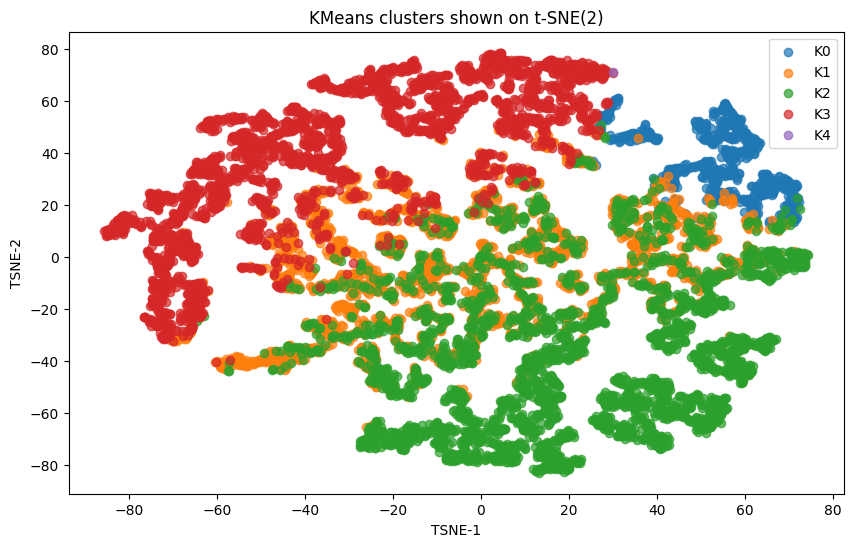

In [ ]:
X_for_tsne = pca1
RANDOM_STATE = 42
tsne = TSNE(n_components=2, perplexity=40, n_iter=1200, random_state= RANDOM_STATE, init='pca')
X_tsne = tsne.fit_transform(X_for_tsne)

#Here we are plotting the t-SNE Graph

plt.figure(figsize=(10, 6))
for cl in np.unique(kmeans_labels):
 ix = kmeans_labels == cl
 plt.scatter(X_tsne[ix, 0], X_tsne[ix, 1], label=f'K{cl}', alpha=0.7)
plt.legend()
plt.title('KMeans clusters shown on t-SNE(2)')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()

**INFERENCE: FROM THE ABOVE GRAPH OBTAINED FROM t-SNE METHOD, WE CAN CONCLUDE THAT THE DATASET 'CUSTOMER DATA' CAN BE BROADLY CLUSTURRED INTO 4 PARTS AS REPRESENTED BY DIFFERENT COLOURS AND THE 5TH CLUSTER(ALTHOUGH PRESENT) IS OVERLAPPED WITH OTHER CLUSTER DATA POSSIBLY DUE TO SIMILAR FEATURES.**

**STEP 10: LABEL ASSIGNMENT ON ORIGINAL DATAFRAME AND VISUALISATION DATA FOR BUSINESS USE-CASES**

**Here we are basically informing the KMeans model that we want create 4 clusters, determine the cluster centers and to assign the datapoints to nearest cluster.
Here the orginal dataset numeric_features is attached with kmeans_labels that we have obtained by creating a "New Column" in it.
Further, the customer identity column has been concatanated with the numeric features with label colums so that the original customer can be traced.**

**Best number of clusters is finally choosen to be 4 based on t-SNE, silhouette score and PCA Graph analysis.**

In [ ]:
best_k = 4

best_kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
kmeans_labels = best_kmeans.fit_predict(scaled_features.values)

numeric_features['cluster_label'] = kmeans_labels
Final_dataset = pd.concat([cust_identity, numeric_features], axis=1)
print(Final_dataset['cluster_label'].value_counts())


cluster_label
2    3043
3    2748
1    2436
0     723
Name: count, dtype: int64


INFERENCE:
1.   CLUSTER 1 HAS 723 ROWS
2.   CLUSTER 2 HAS 2436 ROWS
3.   CLUSTER 3 HAS 3043 ROWS
4.   CLUSTER 4 HAS 2748 ROWS








**As the original dataset is clusturred into 4 parts based on labels, we can now analyse the data based on the simliar features that are useful for obtaining business trends.
Here we are extracting the mean data of columns for each of the clusters by using groupby with cluster label.**

In [ ]:
cluster_profile = Final_dataset.groupby('cluster_label').mean(numeric_only=True)  #numeric only here is True as we have only 1 column with strings
print(cluster_profile)


                   BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster_label                                                                  
0              3101.194769           0.985557  5732.974689       3735.366487   
1               976.389456           0.837846   918.512849        816.712184   
2               652.267868           0.848544   722.739422        119.516122   
3              2691.612101           0.915540   144.450218         90.409774   

               INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster_label                                                              
0                         1998.438077   1115.891258             0.953404   
1                          101.976314    243.793907             0.454252   
2                          603.728419    182.533660             0.754780   
3                           54.084720   2476.264626             0.107705   

               ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLME

**BUSINESS INSIGHTS BASED ON CUSTOMER CLUSTERS:**
1. **CLUSTER 1 HAS PEOPLE WHO NOT ONLY MAINTAIN HIGH BALANCE BUT ARE ALSO HEAVY SPENDERS. THEY POSSES LOW RISK AS THEIR PAYMENT TO CREDIT RATIO IS GOOD.**
2. **CLUSTER 2 HAS PEOPLE WHO POSSES HIGH RISK AS THE CASH ADVANCE PER TRANSACTION IS HIGH AND PURCHASE FULL PAYMENT IS LOW AS COMPARED TO BANK BALANCE MAINTAINED.**
3. **CLUSTER 3 HAS PEOPLE WHO MAINTAINS SIGNIFICANTLY LOWER BALANCE AND ALSO AVERAGE PURCHASE AMOUNT, UTILISATION ARE QUITE LOW, CREDIT LIMIT IS ALSO NOT UTILISED FULLY.**
4. **CLUSTER 4 HAS PEOPLE WHO MAINTAINS A GOOD BALANCE, PAYMENT TO CREDIT RATIO, GOOD CREDIT USERS FROM BANK BUT AVERAGE PURCHASES ARE LOW.**

**Here we can change the cluster number and column name manually to view the distribution of parameters.**

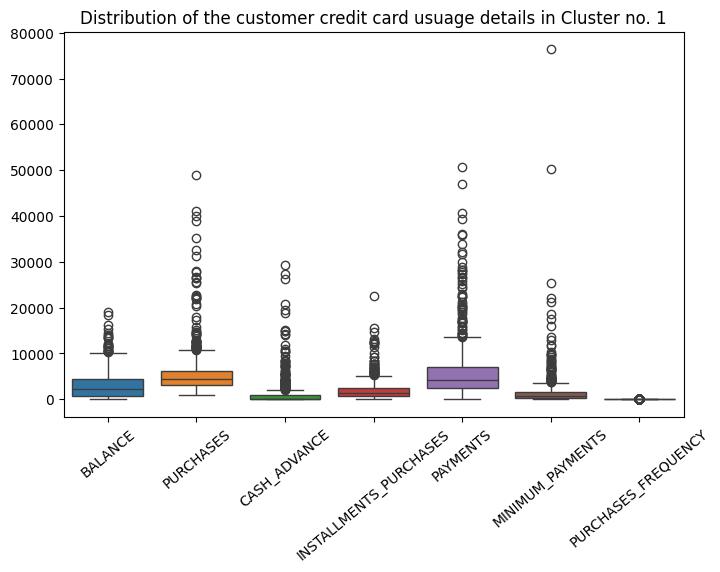

In [ ]:
cluster_num = 0
Needed_ft = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'INSTALLMENTS_PURCHASES','PAYMENTS','MINIMUM_PAYMENTS', 'PURCHASES_FREQUENCY']
j = Final_dataset[numeric_features['cluster_label'] == cluster_num]


#Plotted a Graph here using sns boxplot for cluster number 1 for showcasing only the selected features.

plt.figure(figsize=(8, 5))
sns.boxplot(data=j[Needed_ft])
plt.title(f'Distribution of the customer credit card usuage details in Cluster no. {cluster_num+1}')
plt.xticks(rotation =40)
plt.show()

**GRAPH EXPLANATION: From the above boxplot data of cluster 1, we can infer that this cluster or group of people maintains a decent bank balance, spends heavily, payments and installment payments are also and cash advances are well in the margins. Thus this particular segment of people can be considered as low risk and loyal customers.**

**Finally we can save the file with the name "Final_dataset_clustured" with the exact customer information and to which characteristic cluster they belong to for further business reserach.**

In [ ]:
Final_dataset_clustured = Final_dataset[['CUST_ID', 'cluster_label']]
Final_dataset_clustured.to_csv('Final_dataset_clustured.csv')
print("Cluster profile saved as 'cluster_profile.csv'")

Cluster profile saved as 'cluster_profile.csv'


**This code finally saves the clusturred data into four sequential csv files
so that the segmented datasets now can be utilised further for taking business driven decisons based on similar credit card usuage patterns.**

In [ ]:
for k, cluster_data in Final_dataset.groupby('cluster_label'):
    filename = f'cluster_{k}.csv'
    cluster_data.to_csv(filename, index=False)
    print(f"Saved cluster {k} with {len(cluster_data)} rows to '{filename}'")


Saved cluster 0 with 723 rows to 'cluster_0.csv'
Saved cluster 1 with 2436 rows to 'cluster_1.csv'
Saved cluster 2 with 3043 rows to 'cluster_2.csv'
Saved cluster 3 with 2748 rows to 'cluster_3.csv'


**CAPSTONE PROJECT CONCLUSION:  IN THIS PROJECT WORK, WE HAVE INITIALLY LOADED OUR NECESSARY LIBRARIES, VISUALISED OUR GIVEN DATASET FOR ANY INCONSISTENCIES, TREATED ACCORINGLY AND CREATED NEW FEATURES FOR KNOWING INSIGHTS AS PER CREDIT CARD USUAGE SEGEMNETS.**

**THEN WE HAVE APPLIED APPROPRIATE UNSUPERVISED LEARNING MACHINE LEARNING ALGORITHMS AFTER PERFORMING NECESSARY SCALING OF DATA TO DETERMINE THE OPTIMAL NUMBER OF CLUSTER WHICH HAVE SIMILAR FEATURES. FINALLY WE HAVE PERFORMED CLUSTURING OF OUR GIVEN DATASET 'Customer Data' FOR EXTRACTING INFORMATION AND REPRESENTING INSIGHTS WHICH ARE IMPORTANT AND BENEFICIAL FOR SEGMENTING SIMILAR CUSTOMERS BASED ON THEIR CREDIT CARD USUAGE.**  

Github link: https://github.com/AnuragBhattacharjee-Mainz/Credit-Card-Usage-Segmentation.git